# Feed-forward сети

Итак, давайте потренируемся тренировать нейронные сети прямого распространения (так как делали на паре)
При этом попробуем создать свою функцию активации на одном из слоев

In [28]:
# Сделаем необходимые импорты

In [29]:
# Загрузим датасет CIFAR-100, сразу же создадим dataloader для него
# Если вам не хватает вычислительных ресурсов, то можно вернуться к CIFAR-10

In [30]:
# Создайте собственную архитектуру! Можете использовать все, что угодно, но в ограничении на использование линейные слои (пока без сверток)
# Давайте добавим ограниченный Leaky_relu, то есть output = max(0.1x, 0.5x)
# Ваша задача добавить его в архитектуру сети как функцию активации

In [31]:
# Запустить обучение (по аналогии с тем, что делали на паре)

# Решение

In [32]:
import torch
import numpy as np

from torch import nn
import torchvision

import torch.nn.functional as F
from torch import optim
import torchvision.transforms as transforms
import matplotlib.pyplot as plt ### воспользуемся для отображения изображения
from tqdm import tqdm 

In [33]:
train_dataset = torchvision.datasets.CIFAR100(root='data/',
                                             train=True,  
                                             transform=transforms.ToTensor(), 
                                             download=True)


image, label = train_dataset[0]
print (image.size())
print (label)

Files already downloaded and verified
torch.Size([3, 32, 32])
19


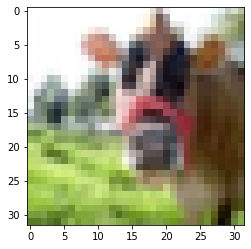

In [34]:
plt.imshow(image.permute(1, 2, 0).numpy())

In [35]:
# создаем обучающую выборку
# DataLoader берет датасет, режет на батчи
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=64, 
                                           shuffle=True)

In [36]:
test_dataset = torchvision.datasets.CIFAR100(root='./data', train=False,
                                       download=True, transform=transforms.ToTensor())
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=4,
                                         shuffle=False)

Files already downloaded and verified


In [37]:
# напишем Feed-forward сеть

class Net(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super().__init__()
        self.fc1 = nn.Linear(input_dim, 8 * hidden_dim)
        self.fc2 = nn.Linear(8 * hidden_dim, 4 * hidden_dim)
        self.fc3 = nn.Linear(4 * hidden_dim, 2 * hidden_dim)
        self.fc4 = nn.Linear(2 * hidden_dim, hidden_dim)        
        self.fc5 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = x.view(x.shape[0], -1)
        x = self.fc1(x)
        x = F.leaky_relu(x, 0.1)
        x = self.fc2(x)
        x = F.leaky_relu(x, 0.1)
        x = self.fc3(x)
        x = F.leaky_relu(x, 0.1)
        x = self.fc4(x)
        x = F.leaky_relu(x, 0.1)
        x = F.leaky_relu(x, 0.5)        
        x = self.fc5(x)        
        #x = F.softmax(x)
        return x


net = Net(3072, 256, 100)

In [38]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [39]:
for epoch in tqdm(range(10)):  
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data[0], data[1]

        # обнуляем градиент
        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # выводим статистику о процессе обучения
        running_loss += loss.item()
        if i % 300 == 0:    # печатаем каждые 300 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Training is finished!')

  0%|          | 0/10 [00:00<?, ?it/s]

[1,     1] loss: 0.002
[1,   301] loss: 0.691
[1,   601] loss: 0.691


 10%|█         | 1/10 [01:04<09:44, 64.99s/it]

[2,     1] loss: 0.002
[2,   301] loss: 0.690
[2,   601] loss: 0.690


 20%|██        | 2/10 [02:09<08:38, 64.84s/it]

[3,     1] loss: 0.002
[3,   301] loss: 0.689
[3,   601] loss: 0.688


 30%|███       | 3/10 [03:14<07:34, 64.89s/it]

[4,     1] loss: 0.002
[4,   301] loss: 0.684
[4,   601] loss: 0.677


 40%|████      | 4/10 [04:19<06:29, 64.99s/it]

[5,     1] loss: 0.002
[5,   301] loss: 0.649
[5,   601] loss: 0.636


 50%|█████     | 5/10 [05:24<05:25, 65.02s/it]

[6,     1] loss: 0.002
[6,   301] loss: 0.621
[6,   601] loss: 0.616


 60%|██████    | 6/10 [06:29<04:19, 64.95s/it]

[7,     1] loss: 0.002
[7,   301] loss: 0.609
[7,   601] loss: 0.608


 70%|███████   | 7/10 [07:34<03:15, 65.02s/it]

[8,     1] loss: 0.002
[8,   301] loss: 0.604
[8,   601] loss: 0.603


 80%|████████  | 8/10 [08:39<02:09, 64.99s/it]

[9,     1] loss: 0.002
[9,   301] loss: 0.599
[9,   601] loss: 0.596


 90%|█████████ | 9/10 [09:44<01:04, 64.95s/it]

[10,     1] loss: 0.002
[10,   301] loss: 0.592
[10,   601] loss: 0.589


100%|██████████| 10/10 [10:49<00:00, 64.97s/it]

Training is finished!


In [40]:
net(data[0]).shape

torch.Size([16, 100])